# Linear Regression

A regression attempts to fit a function to observed data to make predictions on new data. A linear regression fits a straight line to observed data, attemptiong to demonstrate a linear relationship between variables and make predictions on new data yet to be observed.

Machine learning has several techniques under its umbrella, and the one with the most use cases currently is supervised learning where regression plays a big role. Moreover, statisticians refers to their regression models as statistical learning whereas professionals in data science as machine learning models.

## A Basic Linear Regression

The benefits of performing a linear regression are essentialy that it allows us to make predictions on data we have not seen before and that we can analyze variables for possible relationshipps and hyphothesize that correlated variables are causal to one another.

However, we cannot always apply a linear regression to our data, since real-word data is noisy and never perfect and will not follow a straight line. In addition, we need to not use linear regression to make predictions outside the range of data we have.

And lastly, we need to put a lot of efforts asking always where does the data come from. Why? Because of BIAS. Data is simply a sample from a population, and we need to practice discernment on how well represented our sample is.

In the following example we will use scikit-learn to perform a basic, unvalidated linear regression on the sample of 10 dogs. We import the data, we divide the columns into X (input columns - predictors, the indipendent variables) and Y (output column - the dependent variable), and perform a basic linear regression.

Before doing so, recall the mathemtical form a straight line:
- $y = mx + b$.

Where $m$ represents the slope of the line while $b$ the intercept, thus, where the line intersecates with the $y$ axis.

    x   y
0   1   5
1   2  10
2   3  10
3   4  15
4   5  14
5   6  15
6   7  19
7   8  18
8   9  25
9  10  23
Slope [1.93939394]
Intercept [4.73333333]


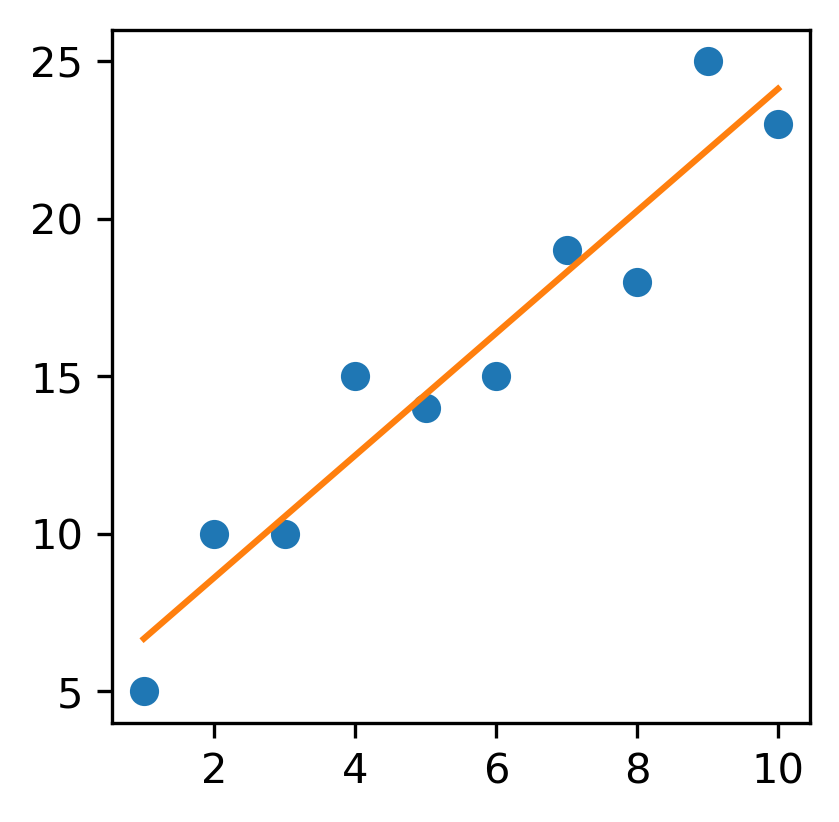

In [3]:
# Example 5-1 Using scikit-learn to do a linear regression
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Import data
df = pd.read_csv('https://bit.ly/2KF29Bd', delimiter=",")
print(df)

# Extract input vars - all rows and the first column
X = df.values[:, :-1]

# Extract output - all rows and the last column
Y = df.values[:, -1]

# Fit a line to the points
fit = LinearRegression().fit(X, Y)

# Results
m = fit.coef_.flatten()  # Slope
b = fit.intercept_.flatten()  # Intercept
print("Slope", m)
print("Intercept", b)

# Chart
fig = plt.figure(figsize=(3,3), dpi=300)
plt.plot(X, Y, 'o')  # Scatterplot
plt.plot(X, m*X+b)  # Line
plt.show()

Thus, we got the coefficients $m$ and $b$ to that describe our fitted linear function. But how can we tell this is the best fitted line?

## Residuals and Squared Errors

In order to get that result we need to ask ourselves:
- what defines a best fit?
- how do we get to that best fit?

The best fit is defined as the minimsation of the residuals sum of squares. The individual residual is just the difference between the $actual$ $y$ and its $predicted$ $value$. We do so for all our points, we square them and finally we sum them. Then, our objective is to minimize this numeric value in order to minimize the gasp (the differences) between our line and the $actual$ $y$ values in our dataset.

This residuals then can be positive or negative, they are positive if the actual value is above the fitted line, and negative when they are below. We grab every residual, we square it and we sum them in order to get the $residual$ $sum$ of $squares$; the numerical value we want to minimize.

Residuals are called even $errors$ since they represent how wrong our line is in predicting the data.

In [11]:
# Using itertuples in our dataframe
points = pd.read_csv('https://bit.ly/2KF29Bd', delimiter=",").itertuples()
for row in points:
    print(row)
# We are organising our DF using a tuple for each row, where the first item 
# represents the index line, the second item the values of the predictor and 
# the third item the value of y.

Pandas(Index=0, x=1, y=5)
Pandas(Index=1, x=2, y=10)
Pandas(Index=2, x=3, y=10)
Pandas(Index=3, x=4, y=15)
Pandas(Index=4, x=5, y=14)
Pandas(Index=5, x=6, y=15)
Pandas(Index=6, x=7, y=19)
Pandas(Index=7, x=8, y=18)
Pandas(Index=8, x=9, y=25)
Pandas(Index=9, x=10, y=23)


In [14]:
# Example 5-2 Calculating residuals for a given line and data
import pandas as pd

# Import data
points = pd.read_csv('https://bit.ly/2KF29Bd', delimiter=",").itertuples()

# Test with a given line - previous results
m = 1.93939  # Slope
b = 4.73333  # Intercept

# Calculate the residuals
for p in points:
    # Get the actual y value
    y_actual = p.y
    # Compute the predicted values using the formula of a straight line
    y_predict = m*p.x + b
    # Compute and print the residual for that point
    residual = y_actual - y_predict
    print(residual)

-1.67272
1.3878900000000005
-0.5515000000000008
2.5091099999999997
-0.4302799999999998
-1.3696699999999993
0.6909400000000012
-2.2484499999999983
2.812160000000002
-1.1272299999999973


We said before we want to minimize the residual sum of squares. So far we computed each residual, now, we need to square and sum them.

In [16]:
# Example 5-2 Calculating the residuals for a given line and data
import pandas as pd

# Import points
points = pd.read_csv('https://bit.ly/2KF29Bd', delimiter=",").itertuples()

# Test with a given line
m = 1.93939
b = 4.73333

sum_of_squares = 0.0

# Calculate sum of squares
for p in points:
    y_actual = p.y
    y_predict = m*p.x + b
    residual_squared = (y_actual - y_predict) ** 2
    # Add the sqaured values of the current residual
    sum_of_squares += residual_squared

print("RSS:", sum_of_squares)

RSS: 28.096969704500005


We don't use the actual values (instead of square them) since negative values will cancel out positives. We don't use the absolute values (instead of square them) because is mathematically incovenient, especially when later we are going to use calculus deriivaties for $gradient$ $descent$.

## Finding the Best Line

So now we know how to measure the quality of a given line against the data points, through the sum of squares ($RSS$). But how do we find the right $m$ and $b$ values to create the least sum of squares? 

We can try several approaches, like a brute force approach, which generates random $m$ and $b$ values, millions of times, and choosing the one that produce the least sum of squares. But, this will not work well because it will take an endless amount of time to find even a decent approximation. So we need something a little more guided, like: 
- closed form,
- matrix decomposition,
- gradient descent,
- and stochastic gradient descent.

But what is exactly machine learning training? Machine learning training is just fitting a regression. We provide some data and an objective function, like the sum of squares, then it will find simply the right coefficients $m$ and $b$ to fulfill that objective (in our case, minimize the $RSS$). So when we train a machine learning model, we really are just minimizing a loss function.

### Closed Form Equation

Some readers may ask if there is a formula, called closed form equation, to fit a linear regression by exact calculation. The answer is yes, but only for a simple linear regression with one input variable. This luxury doesn't exist for many machine learning problems with several input variables and a large amount of data. For a simple linear regression with only one input and one output variable, we can simply refer to the formulas (pg. 157) to compute $m$ and $b$. 

Here an example to calculate $m$ and $b$.

In [19]:
# Example 5-5 Calculating m and b for a simple linear regression
import pandas as pd

# Import points
points = list(pd.read_csv('https://bit.ly/2KF29Bd', delimiter=",").itertuples())

n = len(points)

# Just the formulas at pg. 157
m = (n*sum(p.x*p.y for p in points) - sum(p.x for p in points)*sum(p.y for p in points)) \
    / (n*sum(p.x**2 for p in points) - (sum(p.x for p in points))**2)
print("m (slope):", m)

b = (sum(p.y for p in points) / n) - (m*sum(p.x for p in points) / n)
print("b (intercept):", b)

m (slope): 1.9393939393939394
b (intercept): 4.7333333333333325


To compute a $predicted$ $y$ $value$ we can simply plug in an $X$ $value$ into the straight-line formula:
- $y = m*X + b$.

In [21]:
# Define our m and b
m = 1.9393939393939394
b = 4.7333333333333325

# Our data points goes from 0 to 10 - so let us define our X as 8.5
X = 8.5

# Compute the predicted y-value based on our m and b
y_hat = m*X + b
print("predicted_y:", round(y_hat,2))

predicted_y: 21.22


### Matrix Inversion

We alternate $m$ and $b$ with different name, $\beta_1$ (slope) and $\beta_0$ (intercept) respectively.

The matrix computations that leads to get the vector of coefficients $b$ is written as follows: 
- $b$ = $(X^T * X)^{-1} * X^T * y$.

This will give us as result the slope and the intercept of our fitted line.

In [38]:
# Example 5-6 Using inverse and transpose matrices to fit a linear regression
import pandas as pd
import numpy as np
from numpy.linalg import inv

# Import points
df = pd.read_csv('https://bit.ly/2KF29Bd', delimiter=",")
print("Original dataframe:")
print(df, "\n")
    
# Extract input variables - we apply flatten to have 
# all values in the same array
X = df.values[:, :-1].flatten()
print("X:")
print(X, "\n")

# Add placeholder "1" column to generate intercept
# We need to attach this column to the previous X
# Then we transpose it to get a column
X_1 = np.vstack([X, np.ones(len(X))]).T
print("X_1:")
print(X_1, "\n")

# Extract output column
Y = df.values[:, -1]
print("Y:")
print(Y, "\n")

# Calculate coefficients for slope and intercept
# We just need to follow the previous given formula
# To compute matrix multiplication we use "@"
b = inv(X_1.transpose() @ X_1) @ (X_1.transpose() @ Y)
print("It gives back m and b, in this order.")
print("Vector of coefficients b:", b, "\n")

# Compute all y_hat for the same actual y_values
# We use dot() to compute the product of two arrays 
# (just another way instead of using @)
y_predict_array = X_1.dot(b)
print("y_hat array (in this case X_1 * Y):", y_predict)
print("We can compare it with Y.")

Original dataframe:
    x   y
0   1   5
1   2  10
2   3  10
3   4  15
4   5  14
5   6  15
6   7  19
7   8  18
8   9  25
9  10  23 

X:
[ 1  2  3  4  5  6  7  8  9 10] 

X_1:
[[ 1.  1.]
 [ 2.  1.]
 [ 3.  1.]
 [ 4.  1.]
 [ 5.  1.]
 [ 6.  1.]
 [ 7.  1.]
 [ 8.  1.]
 [ 9.  1.]
 [10.  1.]] 

Y:
[ 5 10 10 15 14 15 19 18 25 23] 

It gives back m and b, in this order.
Vector of coefficients b: [1.93939394 4.73333333] 

y_hat array (in this case X_1 * Y): [ 6.67272727  8.61212121 10.55151515 12.49090909 14.43030303 16.36969697
 18.30909091 20.24848485 22.18787879 24.12727273]
We can compare it with Y.


In the previous example we stacked a column of 1s next to our $X$ column (because of this, it generates an intercept and not a slope). This will generate the intercept $\beta_0$ coefficient. 

### Matrix Decomposition

When you have a lot of data with a lot of dimensions, computers can start to choke and produce unstanble results. This is a use case for matrix decomposition. Specifically, we take our matrix $X$, append an additional column of 1s to generate the intercpet $\beta_0$ like before, and then decompose it into two component matrices, $Q$ and $R$:
- $X = Q * R$.

Here is how we use $Q$ and $R$ to find the beta coefficient values in the matrix form $b$:
- $b = R^{-1} * Q^T * y$.

In [42]:
# Example 5-7 Using QR decomposition to perform a linear regression
import pandas as pd
import numpy as np
from numpy.linalg import qr, inv

# Import points
df = pd.read_csv('https://bit.ly/2KF29Bd', delimiter=",")
    
# Extract input variables 
X = df.values[:, :-1].flatten()
print("X:")
print(X)

# Add placeholder "1" column to generate intercept
X_1 = np.vstack([X, np.ones(len(X))]).T
print("X_1:")
print(X_1)

# Extract output column
Y = df.values[:, -1]
print("Y:")
print(Y)

# Calculate coefficients for slope and intercept using 
# QR decomposition
# Extract Q and R from the X matrix with the column of 1s
Q, R = qr(X_1)
# Compute the vector of coefficients b through QR Decomposition
# First way, with dot()
b = inv(R).dot(Q.transpose()).dot(Y)
print("b:", b)
# Second way, with @
b = inv(R) @ (Q.transpose() @ Y)
print("b:", b)

X:
[ 1  2  3  4  5  6  7  8  9 10]
X_1:
[[ 1.  1.]
 [ 2.  1.]
 [ 3.  1.]
 [ 4.  1.]
 [ 5.  1.]
 [ 6.  1.]
 [ 7.  1.]
 [ 8.  1.]
 [ 9.  1.]
 [10.  1.]]
Y:
[ 5 10 10 15 14 15 19 18 25 23]
b: [1.93939394 4.73333333]
b: [1.93939394 4.73333333]


This is the method used by scientific libraries for linear regression because it copes with large amounts of data easily and is more stable.

### Gradient Descent

$Gradient$ $Descent$ is an optimisation techinique that uses derivatives and iterations to minimize or maximize a set of parameters against an objective.

In order to minimize our loss function ($RSS$) we can use the approach of $Gradient$ $Descent$ which has among its features the partial derivatives which allow us to see the slope for each parameter (in our case $m$ and $b$). We step in directions for $m$ and $b$ where the slope goes downward. In order to compute the slope we just take a fraction this "step". This fraction is called $learning$ $rate$, the higher it is the lower the accuracy whereas the lower it is the longer it will take to train and require more iterations. Thus, it is necessary to chose carefully the learning rate.

In order to explore this approach, let us find the minimum of this parabola:
- $f(x) = (x - 3)^2 + 4$.

To find this minimum point we use the $Gradient$ $Descent$. We start from a random $x$ value and then we want to step $x$ toward the minimum where the slope is 0. To do so, we compute derivatives, and then compute the $Gradient$ $Descent$.

In [53]:
# Example 5-8 Using Gradient Descent to find the minimum of a parabola
import pandas as pd
import random

# Import points
points = list(pd.read_csv('https://bit.ly/2KF29Bd', delimiter=",").itertuples())

# First, let us see the dataframe itself
print("Dataframe:")
for row in points:
    print(row)
print("\n")

def f(x):
    return (x - 3)**2 + 4

def dx_f(x):
    return 2*(x - 3)

# Learning rate
L = 0.001

# Iterations to perform gradient descent
iterations = 100_000

# Start at random x in a range that goes from -15 to 15
x = random.randint(-15, 15)

# Gradient Descent
for i in range(iterations):
    # Get slope
    d_x = dx_f(x)
    # Subtract for every iterations (from 0 to 99999) to x --> L * slope
    x -= L * d_x

print("Gradient Descent's result:")
print("x:", x, "y:", f(x))

Dataframe:
Pandas(Index=0, x=1, y=5)
Pandas(Index=1, x=2, y=10)
Pandas(Index=2, x=3, y=10)
Pandas(Index=3, x=4, y=15)
Pandas(Index=4, x=5, y=14)
Pandas(Index=5, x=6, y=15)
Pandas(Index=6, x=7, y=19)
Pandas(Index=7, x=8, y=18)
Pandas(Index=8, x=9, y=25)
Pandas(Index=9, x=10, y=23)


Gradient Descent's result:
x: 2.999999999999889 y: 4.0


The learning rate is used to take a fraction of the slope and subtract it from the $x$-value on each iteration. Bigger slopes will result in bigger steps, and smaller slopes in smaller steps. After enough iterations the $x$ will end up at the lowest point of the function, where the slope is 0.

Instead of using $x$, in linear regressions we use $m$ and $b$. Recall in our linear regression we already know $x$ and $y$ values since they are provided with the training data. In order to compute the slope for these two variables we just need to find the partial derivatives of our $RSS$ (with respect to $m$ and $b$), the objective function (or loss function) we want to minimize.

After that, we perform $Gradient Descent$, so in each iterations we lower $m$ and $b$ (the initial points) by subtracting to them their derivatives * slope, till the end of the iteration.

Recall the $RSS$ is just:
- $\sum_{i = 0}^{n} (\hat{y} - y)^2$ = $(mx_i + b - y_i)^2$.

Thus, the partial derivatives are:
- $\frac{\partial RSS}{\partial m}$ = $\sum_{i = 0}^{n} 2x_i(mx_i + b - y_i)$;
- $\frac{\partial RSS}{\partial b}$ = $\sum_{i = 0}^{n} 2(mx_i + b - y_i)$.

In [54]:
# Example 5-9 Performing Gradient Descent for a linear regression
import pandas as pd

# Import points
points = list(pd.read_csv('https://bit.ly/2KF29Bd', delimiter=",").itertuples())

# First, let us see the dataframe itself
print("Dataframe:")
for row in points:
    print(row)
print("\n")

# Build the model
m = 0
b = 0

# Learning rate
L = .001

# Iterations to perform gradient descent
iterations = 100_000

# Elements in X
n = float(len(points))
print(f"There are {n} elements in X. \n")

# Perform Gradient Descent
for i in range(iterations):
    # Get slope with respect to m
    D_m = sum(2 * p.x * (m * p.x + b - p.y) for p in points)
    # Subtract for every iterations (from 0 to 99999) to m --> L * slope
    m -= L * D_m
    
    # Get slope with respect to b
    D_b = sum(2 * (m * p.x + b - p.y) for p in points)
    # Subtract for every iterations (from 0 to 99999) to b --> L * slope
    b -= L * D_b

print("Gradient Descent's result:")
print("m:", m, "b:", b)

Dataframe:
Pandas(Index=0, x=1, y=5)
Pandas(Index=1, x=2, y=10)
Pandas(Index=2, x=3, y=10)
Pandas(Index=3, x=4, y=15)
Pandas(Index=4, x=5, y=14)
Pandas(Index=5, x=6, y=15)
Pandas(Index=6, x=7, y=19)
Pandas(Index=7, x=8, y=18)
Pandas(Index=8, x=9, y=25)
Pandas(Index=9, x=10, y=23)


There are 10.0 elements in X. 

Gradient Descent's result:
m: 1.9393939393939548 b: 4.733333333333227


We got quite close to the results provided by the Closed Form Equation ($m$ = 1.9393939393939394 and $b$ = 4.7333333333333325). However, this does not mean our linear regressions is any good since minimising the $RSS$ does not guarantee we have a great model to make predictions.

In the text are given two example to perform Gradient Descent using SymPy plus a plot of this approach.

### Stochastic Gradient Descent